**THIS CHAPTER IS CURRENTLY UNDER CONSTRUCTION!!!**

(information-theory)=
# Information theory



## KL divergence and entropy

The basic measure that we use in this chapter to compare two probability measures $P$ and $Q$ is the mean logarithmic relative magnitude of $P$ to $Q$. The types of measures that we shall work with initially are ones defined on a finite probability space $S$, so that they have mass functions $p(s)$ and $q(s)$ with finite support.

```{margin}

Of course, the two notions of _absolute relative magnitude_ and _logarithmic relative magnitude_ make sense for any pair of numbers, not necessarily probabilities.
```

The _absolute relative magnitude_ of the probability $p(s)$ to the probability $q(s)$ ordinarily refers to the ratio $p(s)/q(s)$, while the _logarithmic relative magnitude_ refers to the base-$10$ logarithm of the absolute relative magnitude:

$$
\log_{10}\left( \frac{p(s)}{q(s)} \right).
$$

The intuition for this number is that it is the _order_ of the absolute relative magnitude; indeed, if we have $p(s) \approx 10^k$ and $q(s) \approx 10^l$, then the logarithmic relative magnitude is roughly the difference $k-l$.

Perhaps the most obvious immediate benefit of introducing the logarithm is that it yields a workable number when $p(s)$ and $q(s)$ are each on different scales. For example, let's suppose that the mass functions $p(s)$ and $q(s)$ are given by

$$
p(s) = \binom{10}{s} (0.4)^s(0.6)^{10-s} \quad \text{and} \quad q(s) = \binom{10}{s} (0.9)^s(0.1)^{10-s}
$$

for $s\in \{0,1,\ldots,10\}$; these are the mass functions of a $\Bin(10,0.4)$ and $\Bin(10,0.9)$ random variable, respectively. We then plot histograms for these mass functions, along with histograms of the absolute and logarithmic relative magnitudes:

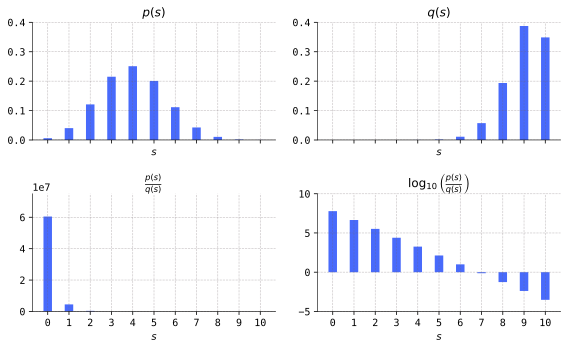

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy as sp
import math
import seaborn as sns
import matplotlib_inline.backend_inline
import warnings
plt.style.use('../aux-files/custom_style_light.mplstyle')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')
blue = '#486AFB'
magenta = '#FD46FC'

grid = np.arange(0, 11)
p = sp.stats.binom(n=10, p=0.4).pmf(grid)
q = sp.stats.binom(n=10, p=0.9).pmf(grid)
titles = ['$p(s)$',
          '$q(s)$',
          '$\\frac{p(s)}{q(s)}$',
          '$\\log_{10}\\left(\\frac{p(s)}{q(s)}\\right)$']
probs = [p,
         q,
         p / q,
         np.log10(p / q)]
ylims = [(0, 0.4),
         (0, 0.4),
         (-50, 0.75e8),
         (-5, 10)]

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 5), sharex=True)

for title, prob, ylim, axis in zip(titles, probs, ylims, axes.flatten()):
    axis.bar(grid, prob, width=0.4)
    axis.set_xticks(ticks=grid)
    axis.set_ylim(ylim)
    axis.set_title(title)
    axis.set_xlabel('$s$')

plt.tight_layout()

The second row in the figure drives home the point: The absolute relative magnitudes are on such widely different scales that the plot is nearly useless, while the logarithmic relative magnitudes yield a much more informative and immediate comparison.

We obtain a single-number summary of the logarithmic relative magnitudes by averaging with weights drawn from the mass function $p(s)$; this yields the number

$$
\sum_{s\in S} p(s) \log_{10}\left( \frac{p(s)}{q(s)} \right).
$$ (first-kl-eq)

Observe that we could have drawn the averaging weights from the mass function $q(s)$ to instead obtain the single-number summary

$$
\sum_{s\in S} q(s) \log_{10}\left( \frac{p(s)}{q(s)} \right).
$$ (second-kl-eq)

But observe that

$$
\sum_{s\in S} q(s) \log_{10}\left( \frac{p(s)}{q(s)} \right) = - \sum_{s\in S} q(s) \log_{10}\left( \frac{q(s)}{p(s)} \right),
$$

where the right-hand side is the negative of a number of the form {eq}`first-kl-eq`. So, at least up to sign, it doesn't really matter which of the two numbers {eq}`first-kl-eq` or {eq}`second-kl-eq` we use to develop our theory. As we will see, our choice of {eq}`first-kl-eq` has the benefit of making the KL divergence nonnegative. Moreover, we can also alter the base of the logarithm in {eq}`first-kl-eq` without altering the core of the theory, since the change-of-base formula for logarithms tells us that the only difference is a multiplicative constant. In the following official definition, we will select the base-$2$ logarithm to make the later connections with bit strings in coding theory more transparent.

```{prf:definition}
:label: KL-def

Let $P$ and $Q$ be two probability measures on a finite probability space $S$ with mass functions $p(s)$ and $q(s)$. Then the _Kullback-Leibler divergence_ (or just _KL divergence_) from $P$ to $Q$, denoted $D(P \parallel Q)$, is the mean order of relative magnitude of $P$ to $Q$. Precisely, it is given by

$$
D(P \parallel Q) \def \sum_{s\in S} p(s) \log_2\left( \frac{p(s)}{q(s)} \right).
$$ (kl-eq)
```

Since averages of the form {eq}`kl-eq` will reoccur so often in the next few chapters, it will be convenient to introduce a new notation for them. So, if $P$ is a discrete probability measure with mass function $p(s)$ on a sample space $S$ and $g:S\to \bbr$ is a real-valued function, we will define

$$
E_P(g(s)) \def \sum_{s\in S} g(s) p(s).
$$

Provided that it is finite, we refer to this sum as the _mean value_ or _expected value_ of $g(s)$. Note that this is a legitimately new usage of the expectation symbol $E$, since there is no random variable given _a priori_. To see the connection with the previous usage of $E$ for a discrete random variable $X$ with mass function $p_X(x)$, suppose that $g:\bbr \to \bbr$ and note

$$
E_{P_X}(g(x)) = \sum_{x\in \bbr}g(x) p_X(x) = E(g(X)).
$$

Indeed, the first equality follows from the definition of $E_{P_X}(g(x))$ given above, while the second equality follows from the LoTUS. Therefore, using this new notation, we may rewrite {eq}`kl-eq` as

$$
D(P \parallel Q) = E_P\left[ \log_2\left(\frac{p(s)}{q(s)}\right)\right].
$$

Notice again that the mean is with respect to $P$. This breaks the symmetry between $P$ and $Q$ so that

$$
D( P \parallel Q) \neq D(Q \parallel P),
$$

except in special cases. Problems are encountered in a strict interpretation of the formula {eq}`kl-eq` when one or the other (or both) of the mass functions are $0$. In these cases, it is conventional to define:

$$
p \log_2\left( \frac{p}{q} \right) = \begin{cases}
0 & : p =0, \ q=0, \\
0 & : p = 0, \ q\neq 0, \\
\infty & : p \neq 0, \ q=0.
\end{cases}
$$

The KL divergence turns out to decompose into a sum of two of the most important quantities in information theory:

```{prf:definition}
:label: entropy-def

Let $P$ and $Q$ be two probability measures on a finite probability space $S$ with mass functions $p(s)$ and $q(s)$.

1. The _cross entropy_ from $P$ to $Q$, denoted $H(P \parallel Q)$, is the number defined by

  $$
  H(P \parallel Q) \def - \sum_{s\in S} p(s)\log_2(q(s)).
  $$

2. The _entropy_ of $P$, denoted $H(P)$, is the number given by

    $$
    H(P) \def - \sum_{s\in S} p(s) \log_2(p(s)).
    $$

    When $\bX$ is a random vector with finite range, we shall often write $H(\bX)$ in place of $H(P_\bX)$.
```

The connection between these entropies and the KL divergence is given in the next theorem. Its proof is a triviality.

```{prf:theorem} KL divergence and entropy
:label: KL-and-entropy-thm

Let $P$ and $Q$ be two probability measures on a finite probability space $S$. Then

$$
D(P\parallel Q) = H(P \parallel Q) - H(P).
$$
```

The inequality in the first part of the following result is perhaps the most important in the foundations of the theory and ultimately justifies our conception of the KL divergence as a "directed distance" between two probability distributions. The second part shows that the maximum-entropy distributions are exactly the uniform ones.

```{prf:theorem} Optimization of KL divergences and entropies
:label: kl-entropy-optim-thm

Let $P$ and $Q$ be two probability measures on a finite probability space $S$.

1. _The Information Inequality_. We have

    $$
    D(P \parallel Q) = H(P \parallel Q) - H(P) \geq 0
    $$

    for all $P$ and $Q$, with equality if and only if $P=Q$.

2. We have 

    $$
    H(P) \leq \log_2{|S|}
    $$

    for all $P$, with equality if and only if $P$ is uniform.
```

```{prf:proof}
For the first part, suppose that $p_1,\ldots,p_n$ and $q_1,\ldots,q_n$ are numbers in $(0,1]$ such that

$$
\sum_{i=1}^n p_i = \sum_{i=1}^n q_i = 1.
$$ (constraint-lagrance-eq)

It will suffice, then, to show that the objective function

$$
J(q_1,\ldots,q_n) \def -\sum_{i=1}^n p_i \log_2{q_i},
$$

is globally minimized when $p_i = q_i$. But it is an eaasy exercise (using Lagrange multipliers) to show that a minimum can only occur when $p_i = q_i$ for each $i=1,\ldots,n$; one may confirm that this indeed yields a global maximum by showing that the objective function $J$ is convex (its Hessian matrix is positive definite) and noticing that the second constraint in {eq}`constraint-lagrance-eq` is affine. (See [here](https://math.stackexchange.com/a/1739181) for an explanation of the latter fact.) The proof of the second part follows the same pattern, with only the obvious changes. Q.E.D.
```

So, when $P$ is uniform, we have

$$
H(P) = \log_2|S|.
$$ (max-ent-eq)

It is pleasing to compare this latter maximum-entropy equation to the [Boltzmann equation](https://en.wikipedia.org/wiki/Boltzmann%27s_entropy_formula) for entropy in statistical mechanics. The definitional equation

$$
H(P) = - \sum_{s\in S} p(s) \log_2(p(s))
$$

is the analog of the [Gibbs equation](https://en.wikipedia.org/wiki/Entropy_(statistical_thermodynamics)#Gibbs_entropy_formula) for Boltzmann entropy.

In his initial paper, Shannon described entropy $H(P)$ as a measure of _uncertainty_. From this perspective, the rationale behind the maximum-entropy equation {eq}`max-ent-eq` becomes clear: If one were to randomly draw a number from a probability distribution, the uniform distribution is the one that would result in the highest level of uncertainty regarding the outcome.













## Source coding

We now describe a coding-theoretic interpretation that sheds additional light on entropy and KL divergence. Rather than quantifying the degree of "uncertainty" present in a probability distribution, in this framework entropy gives a lower bound on the (average) minimum description length of the data modeled by a random variable or vector.

```{margin}

According to our definitions, technically the codomain of a random variable must be a subset of $\bbr$; but we can get around this minor annoyance by assuming that $a=1$, $b=2$, $c=3$, and $d=4$.
```

By way of introduction, suppose that $X$ is a discrete random variable with range $R = \{a,b,c,d\}$. Our goal is to construct an _encoding_ of $X$, by which we mean an assignment of a bit string to each symbol in $R$. For example, we might encode $X$ as

$$
a \leftrightarrow 00, \quad b \leftrightarrow 011, \quad c \leftrightarrow 10, \quad d \leftrightarrow 1100.
$$ (encoding-eqn)

We can _visualize_ this encoding by drawing a binary tree with five levels (including the root):

```{image} ../img/tree-01.svg
:width: 90%
:align: center
```
&nbsp;

To read this tree, begin at the root node at the top; then, follow the edges downward to find the nodes labeled by the symbols in $R$. A positively sloped edge represents a $0$, while a negatively edge represents a $1$. Thus, for example, to reach $d$ beginning from the root node, we follow edges labelled $1$, $1$, $0$, and $0$. This sequence of binary digits is exactly the code word for $d$, and thus paths through the tree represent code words. The numbered levels $\ell$ of the tree appear along the left-hand side of the figure; notice that these numbers are also the lengths of the code words.

Notice also that every path through the tree beginning at the root node and ending at a leaf in the lowest level contains at most one symbol in $R$. This is in contrast to the encoding of $X$ represented by the following tree:

```{image} ../img/tree-bad.svg
:width: 90%
:align: center
```
&nbsp;

with corresponding code words

$$
a \leftrightarrow 00, \quad b \leftrightarrow 001, \quad c \leftrightarrow 10, \quad d \leftrightarrow 1000.
$$

Indeed, in this latter encoding, there are _multiple_ paths from the top to the bottom level that contain more than one symbol in $R$. These paths manifest themselves as code words that are prefixes of other code words: The code word for $a$ appears as a prefix in the code word for $b$, and the code word for $c$ appears as a prefix in the code word for $d$. For this reason, encodings like the first {eq}`encoding-eqn` are called _prefix-free codes_.

Now, returning to our prefix-free code, consider the set of all descendants of symbols in $R$ that are in the lowest level, including any symbols in $R$ that happen to lie in the lowest level; these are all highlighted in:

```{image} ../img/tree-02.svg
:width: 90%
:align: center
```
&nbsp;

If a symbol in $R$ is on level $\ell_i$, then it has $4 - \ell_i$ descendents in the lowest level. Then obviously $\sum_{i=1}^4 2^{4-\ell_i} \leq 2^{4}$ (count the highlighted nodes!), and so

$$
\sum_{i=1}^4 2^{-\ell_i} \leq 1.
$$

In fact, this latter inequality should _always_ be true for _any_ encoding of $X$, provided that the code is prefix free. Can you see why?







## Conditional entropy and mutual information



```{prf:definition}
:label: mutual-info-def

Let $\bX$ and $\bY$ be two random vectors with finite ranges. The *mutual information between $\bX$ and $\bY$* is the KL divergence

$$
I(\bX, \bY) \def D( P_{(\bX,\bY)} \parallel P_{\bX} P_{\bY}).
$$
```

```{prf:theorem} Mutual information and entropy
:label: other-info-thm

Let $\bX$ and $\bY$ be two random vectors with finite ranges. Then:

$$
I(\bX,\bY) = H(\bX) + H(\bY) - H(\bX,\bY).
$$
```

```{prf:proof}

The proof is a computation:

\begin{align*}
I(\bX,\bY) &= \sum_{\bx\in \bbr^n}\sum_{\by \in \bbr^m} p(\bx,\by) \log_2\left( \frac{p(\bx,\by)}{p(\bx)p(\by)} \right) \\
&= \sum_{\bx\in \bbr^n}\sum_{\by \in \bbr^m} p(\bx,\by) \log_2\left(p(\bx,\by)\right) - \sum_{\bx\in \bbr^n}\sum_{\by \in \bbr^m} p(\bx,\by) \log_2 \left(p(\bx)\right) \\
&\quad - \sum_{\bx\in \bbr^n}\sum_{\by \in \bbr^m} p(\bx,\by) \log_2\left(p(\by)\right) \\
&= - H(\bX,\bY) - \sum_{\bx \in \bbr^n} p(\bx) \log_2\left( p(\bx) \right) - \sum_{\by \in \bbr^m} p(\by) \log_2\left( p(\by)\right) \\
&= H(\bX) + H(\bY) - H(\bX, \bY),
\end{align*}

as desired. Q.E.D.
```